* MNIST with Convoluted NN Keras
* Train set is made of Kaggle 42k + Keras 60k = 102k
* CV on train and then test on 10k from Keras
* Final model is trained on train+test = 112k
* CNN with adam ( vs rmsprop) and dropout against overfitting

* It's a quick intro to the capabilities of CNN and Keras

In [19]:
# IMPORT modules
# TURN ON the GPU !!!
# If importing dataset from outside - like the Keras dataset - Internet must be "connected"

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical

from keras.datasets import mnist

print(os.getcwd())
print("Modules imported \n")
print("Files in current directory:")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

/kaggle/working
Modules imported 

Files in current directory:
sample_submission.csv
test.csv
train.csv



In [20]:
help(check_output)

Help on function check_output in module subprocess:

check_output(*popenargs, timeout=None, **kwargs)
    Run command with arguments and return its output.
    
    If the exit code was non-zero it raises a CalledProcessError.  The
    CalledProcessError object will have the return code in the returncode
    attribute and output in the output attribute.
    
    The arguments are the same as for the Popen constructor.  Example:
    
    >>> check_output(["ls", "-l", "/dev/null"])
    b'crw-rw-rw- 1 root root 1, 3 Oct 18  2007 /dev/null\n'
    
    The stdout argument is not allowed as it is used internally.
    To capture standard error in the result, use stderr=STDOUT.
    
    >>> check_output(["/bin/sh", "-c",
    ...               "ls -l non_existent_file ; exit 0"],
    ...              stderr=STDOUT)
    b'ls: non_existent_file: No such file or directory\n'
    
    There is an additional optional argument, "input", allowing you to
    pass a string to the subprocess's stdin.  If

In [21]:
# LOAD DATA from Kaggle

trainRaw = pd.read_csv('../input/train.csv')
testRaw = pd.read_csv('../input/test.csv')

In [22]:
train = trainRaw.copy()
test_imagesKaggle = testRaw.copy()
train_labelsKaggle = trainRaw['label']

print("train with Labels  ", train.shape)
print("train_labelsKaggle ", train_labelsKaggle.shape)
print("_"*50)
train.drop(['label'],axis=1, inplace=True)
train_imagesKaggle = train
print("train_imagesKaggle without Labels ", train_imagesKaggle.shape)
print("_"*50)
print("test_imagesKaggle  ", test_imagesKaggle.shape)

train with Labels   (42000, 785)
train_labelsKaggle  (42000,)
__________________________________________________
train_imagesKaggle without Labels  (42000, 784)
__________________________________________________
test_imagesKaggle   (28000, 784)


In [23]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

train image
2


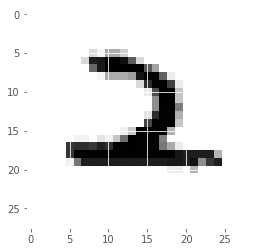

test image


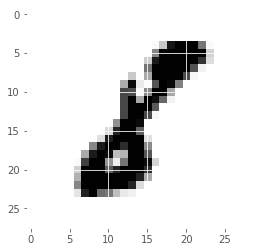

In [24]:
# RESHAPE to 28 X 28 (Height, Width) which Kaggle has flattened in their file

train4Display = np.array(train_imagesKaggle).reshape(42000,28,28)
test4Display = np.array(test_imagesKaggle).reshape(28000,28,28)

z = 4056

print("train image")
print(train_labelsKaggle[z])
digit = train4Display[z]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print("test image")
digit = test4Display[z]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [25]:
# NORMALIZE / SCALE and Prep for CNN in terms of number dimensions expected

train_imagesKaggle = train4Display.reshape(42000,28,28,1)
test_imagesKaggle = test4Display.reshape(28000,28,28,1)

train_imagesKaggle = train_imagesKaggle.astype('float32') / 255
test_imagesKaggle = test_imagesKaggle.astype('float32') / 255
print("train_imagesKaggle ",train_imagesKaggle.shape)
print("test_imagesKaggle ", test_imagesKaggle.shape)
print("_"*50)

# ONE HOT ENCODER for the labels
train_labelsKaggle = to_categorical(train_labelsKaggle)
print("train_labelsKaggle ",train_labelsKaggle.shape)

train_imagesKaggle  (42000, 28, 28, 1)
test_imagesKaggle  (28000, 28, 28, 1)
__________________________________________________
train_labelsKaggle  (42000, 10)


In [26]:
# Load Data from Keras MNIST

(train_imagesRaw, train_labelsRaw), (test_imagesRaw, test_labelsRaw) = mnist.load_data()

In [27]:
# Normalize / Scale and One Hot encoder for the Keras dataset & Reshape for CNN

train_imagesKeras = train_imagesRaw.copy()
train_labelsKeras = train_labelsRaw.copy()
test_imagesKeras = test_imagesRaw.copy()
test_labelsKeras = test_labelsRaw.copy()

train_imagesKeras = train_imagesKeras.reshape(60000,28,28,1)
test_imagesKeras = test_imagesKeras.reshape(10000,28,28,1)

print("train_imagesKeras ",train_imagesKeras.shape)
print("train_labelsKeras ",train_labelsKeras.shape)
print("test_imagesKeras ", test_imagesKeras.shape)
print("test_labelsKeras ", test_labelsKeras.shape)

# NORMALIZE 0-255 to 0-1
train_imagesKeras = train_imagesKeras.astype('float32') / 255
test_imagesKeras = test_imagesKeras.astype('float32') / 255
print("_"*50)

# ONE HOT ENCODER for the labels
train_labelsKeras = to_categorical(train_labelsKeras)
test_labelsKeras = to_categorical(test_labelsKeras)
print("train_labelsKeras ",train_labelsKeras.shape)
print("test_labelsKeras ", test_labelsKeras.shape)

train_imagesKeras  (60000, 28, 28, 1)
train_labelsKeras  (60000,)
test_imagesKeras  (10000, 28, 28, 1)
test_labelsKeras  (10000,)
__________________________________________________
train_labelsKeras  (60000, 10)
test_labelsKeras  (10000, 10)


In [28]:
# CONCATENATE the training sets of Kaggle and Keras into final TRAIN and leave the test for CV

train_images = np.concatenate((train_imagesKeras,train_imagesKaggle), axis=0)
print("new Concatenated train_images ", train_images.shape)
print("_"*50)

train_labels = np.concatenate((train_labelsKeras,train_labelsKaggle), axis=0)
print("new Concatenated train_labels ", train_labels.shape)

new Concatenated train_images  (102000, 28, 28, 1)
__________________________________________________
new Concatenated train_labels  (102000, 10)


In [29]:
# Initial model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [30]:
# Initial fIT & Evaluate initial model

num_epochs = 30
BatchSize = 2048

model.fit(train_images, train_labels, epochs=num_epochs, batch_size=BatchSize)
test_loss, test_acc = model.evaluate(test_imagesKeras, test_labelsKeras)
print("_"*80)
print("Accuracy on test ", test_acc)

Epoch 1/30
102000/102000 [==============================] - 12s 118us/step - loss: 0.8525 - acc: 0.7210
Epoch 2/30
102000/102000 [==============================] - 6s 58us/step - loss: 0.2753 - acc: 0.9140
Epoch 3/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.1663 - acc: 0.9486
Epoch 4/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.1280 - acc: 0.9603
Epoch 5/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.1009 - acc: 0.9684
Epoch 6/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.0868 - acc: 0.9730
Epoch 7/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.0766 - acc: 0.9761
Epoch 8/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.0664 - acc: 0.9794
Epoch 9/30
102000/102000 [==============================] - 6s 57us/step - loss: 0.0620 - acc: 0.9805
Epoch 10/30
102000/102000 [==============================] - 6s 57us/step - loss

In [31]:
# NN MODEL

def build_model():    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
# Check some test vs pred
#TestNum = 10
#for t in range(100, 100+TestNum):
#    print(predictions[t])
#    digit = test_imagesRaw[t]
#    plt.imshow(digit, cmap=plt.cm.binary)
#    plt.show()

In [ ]:
# CHECK ALL the ERRORS
#TestNum = test_labels.shape[0]
#ErrCount = 0
#for t in range(TestNum):
#        if test_labelsRaw[t] != predictions[t]:
#            ErrCount = ErrCount +1
#            #print("True ", test_labelsRaw[t], "Predicted ",predictions[t])
#            #digit = test_imagesRaw[t]
#            #plt.imshow(digit, cmap=plt.cm.binary)
#            #plt.show()

#print("Errors ", ErrCount, " out of ", TestNum, " = ", 100 * ErrCount/TestNum)

In [32]:
# CROSS VALIDATION k-fold
train_data = train_images
train_targets = train_labels
k = 4
num_val_samples = len(train_data) // k
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=BatchSize, verbose=0)
    
    mae_history = history.history['acc']
    all_mae_histories.append(mae_history)
    
print("Done CV k-fold")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
Done CV k-fold


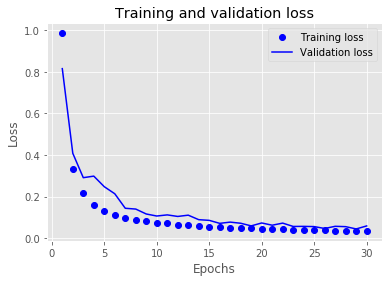

In [33]:
# LOSS Learning curves

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history.history['acc']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

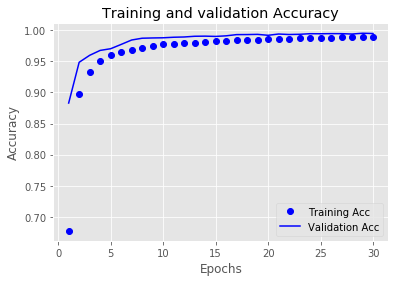

In [34]:
# ACCURACY Learning Curves

history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, (len(history.history['acc']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training Acc')
plt.plot(epochs, val_loss_values, 'b', label='Validation Acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# CONCATENATE the train with test for FINAL FIT

train_imagesFin = np.concatenate((train_images,test_imagesKeras), axis=0)
print("train_imagesFin ", train_imagesFin.shape)
print("_"*50)

train_labelsFin = np.concatenate((train_labels,test_labelsKeras), axis=0)
print("train_labelsFin ", train_labelsFin.shape)

train_imagesFin  (112000, 28, 28, 1)
__________________________________________________
train_labelsFin  (112000, 10)


In [36]:
# FINAL FIT according to the above charts

model = build_model()
model.fit(train_imagesFin, train_labelsFin, epochs=num_epochs, batch_size=BatchSize)

Epoch 1/30
112000/112000 [==============================] - 7s 66us/step - loss: 0.7953 - acc: 0.7392
Epoch 2/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.2493 - acc: 0.9223
Epoch 3/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.1535 - acc: 0.9523
Epoch 4/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.1122 - acc: 0.9645
Epoch 5/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.0923 - acc: 0.9708
Epoch 6/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.0783 - acc: 0.9756
Epoch 7/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.0691 - acc: 0.9785
Epoch 8/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.0615 - acc: 0.9805
Epoch 9/30
112000/112000 [==============================] - 6s 57us/step - loss: 0.0575 - acc: 0.9815
Epoch 10/30
112000/112000 [==============================] - 6s 57us/step - loss: 

In [38]:
# PREDICT & ARGMAX to get the digit from the probability of softmax layer

RawPred = model.predict(test_imagesKaggle)
pred = []
numTest = RawPred.shape[0]
for i in range(numTest):
    pred.append(np.argmax(RawPred[i])) 
predictions = np.array(pred)  

In [39]:
# SUBMISSION
sample_submission = pd.read_csv('../input/sample_submission.csv')
#print(sample_submission.shape)
result=pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':predictions})
result.to_csv("submission.csv",index=False)
print(result)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      1
27983    2